## Module 4 Exam
### Q3 
#### Hemant Sethi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 250)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


random_state = 21

In [2]:
data = {
    'Purchase variety': ['High', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
                         'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High',
                         'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High'],
    'Average monthly spend': [324.79, 232.33, 201.29, 35.40, 86.86, 35.85, 38.10, 109.12, 122.10, 300.80,
                              151.71, 117.57, 202.45, 305.43, 466.83, 215.88, 339.53, 383.11, 311.06, 280.51,
                              137.29, 255.59, 182.04, 206.48, 379.77, 149.15, 59.46, 437.98, 209.66, 33.98],
    'Age of account': [101, 88, 43, 10, 64, 104, 5, 116, 110, 68,
                       23, 27, 120, 50, 63, 23, 96, 95, 24, 96,
                       62, 30, 89, 58, 59, 105, 18, 87, 12, 33],
    'Product categories purchased': [
        ['Home & Kitchen', 'Toys', 'Beauty', 'Clothing'],
        ['Electronics', 'Beauty', 'Automotive', 'Home & Kitchen'],
        ['Automotive', 'Books', 'Sports', 'Home & Kitchen'],
        ['Sports', 'Home & Kitchen', 'Automotive', 'Electronics'],
        ['Electronics', 'Beauty', 'Clothing', 'Automotive'],
        ['Books', 'Sports', 'Toys', 'Clothing'],
        ['Sports', 'Toys', 'Clothing', 'Beauty'],
        ['Clothing', 'Beauty', 'Sports', 'Books'],
        ['Clothing', 'Home & Kitchen', 'Automotive', 'Books'],
        ['Toys', 'Sports', 'Electronics', 'Clothing'],
        ['Automotive', 'Toys', 'Beauty', 'Clothing'],
        ['Electronics', 'Home & Kitchen', 'Clothing', 'Books'],
        ['Sports', 'Automotive', 'Toys', 'Clothing'],
        ['Automotive', 'Electronics', 'Books', 'Toys'],
        ['Home & Kitchen', 'Clothing', 'Electronics','Books'],
        ['Home & Kitchen','Automotive','Books','Electronics'],
        ['Electronics','Beauty','Clothing','Automotive'],
        ['Automotive','Clothing','Books','Home & Kitchen'],
        ['Beauty','Books','Toys','Clothing'],
        ['Home & Kitchen','Toys','Clothing','Beauty'],
        ['Toys','Clothing','Sports','Electronics'],
        ['Automotive','Clothing','Books','Toys'],
        ['Electronics','Automotive','Home & Kitchen','Clothing'],
        ['Automotive','Toys','Electronics','Sports'],
        ['Clothing','Sports','Home & Kitchen','Automotive'],
        ['Toys','Sports','Home & Kitchen','Electronics'],
        ['Books','Clothing','Beauty','Toys'],
        ['Clothing','Electronics','Home & Kitchen','Sports'],
        ['Toys','Books','Beauty','Clothing'],
        ['Electronics','Sports','Automotive','Books']
    ]
}

df = pd.DataFrame(data)
print(df)

   Purchase variety  Average monthly spend  Age of account                       Product categories purchased
0              High                 324.79             101           [Home & Kitchen, Toys, Beauty, Clothing]
1               Low                 232.33              88  [Electronics, Beauty, Automotive, Home & Kitchen]
2              High                 201.29              43        [Automotive, Books, Sports, Home & Kitchen]
3              High                  35.40              10  [Sports, Home & Kitchen, Automotive, Electronics]
4               Low                  86.86              64        [Electronics, Beauty, Clothing, Automotive]
5               Low                  35.85             104                    [Books, Sports, Toys, Clothing]
6               Low                  38.10               5                   [Sports, Toys, Clothing, Beauty]
7              High                 109.12             116                  [Clothing, Beauty, Sports, Books]
8         

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Purchase variety              30 non-null     object 
 1   Average monthly spend         30 non-null     float64
 2   Age of account                30 non-null     int64  
 3   Product categories purchased  30 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


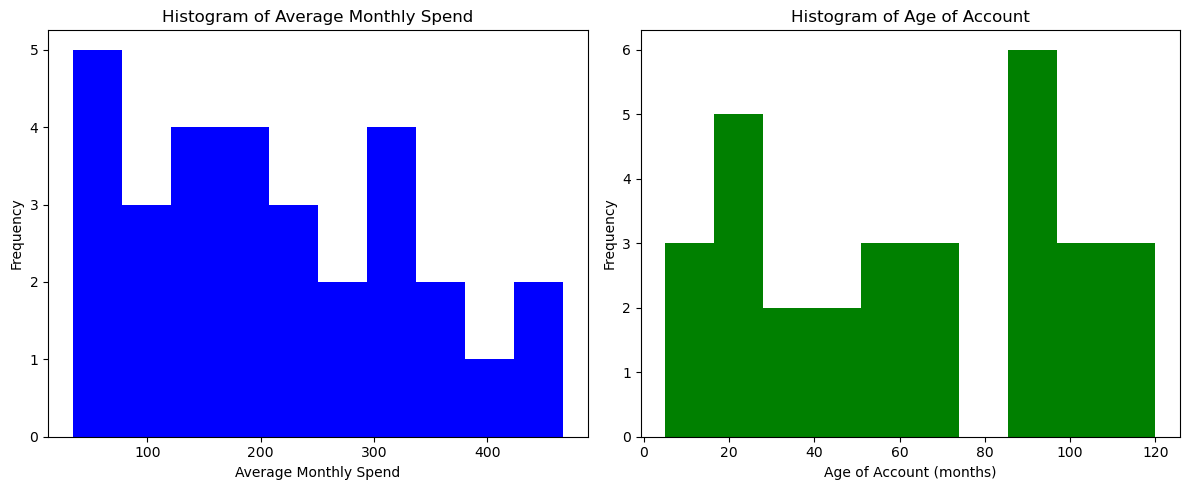

In [4]:
# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for Average Monthly Spend
plt.subplot(1, 2, 1)
plt.hist(df['Average monthly spend'], bins=10, color='blue',)
plt.title('Histogram of Average Monthly Spend')
plt.xlabel('Average Monthly Spend')
plt.ylabel('Frequency')

# Histogram for Age of Account
plt.subplot(1, 2, 2)
plt.hist(df['Age of account'], bins=10, color='green')
plt.title('Histogram of Age of Account')
plt.xlabel('Age of Account (months)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
# Data prep

# Encode purchase variety text columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Purchase variety'] = le.fit_transform(df['Purchase variety'])

df.head()

,Purchase variety,Average monthly spend,Age of account,Product categories purchased
0,0,324.79,101,"[Home & Kitchen, Toys, Beauty, Clothing]"
1,1,232.33,88,"[Electronics, Beauty, Automotive, Home & Kitchen]"
2,0,201.29,43,"[Automotive, Books, Sports, Home & Kitchen]"
3,0,35.40,10,"[Sports, Home & Kitchen, Automotive, Electronics]"
4,1,86.86,64,"[Electronics, Beauty, Clothing, Automotive]"


In [6]:
# Determine CC eligibility

# Calculate thresholds (75th percentiles)
spend_threshold = df['Average monthly spend'].quantile(0.75)
account_age_threshold = df['Age of account'].quantile(0.75)

# Add eligibility column
df['Eligible'] = np.where(
    (df['Average monthly spend'] >= spend_threshold) & (df['Age of account'] >= account_age_threshold),
    1,
    0
)
df.head()

print('Spend threshold ($): $', spend_threshold)
print('Account age threshold (months): ', account_age_threshold)


Spend threshold ($): $ 304.27250000000004
Account age threshold (months):  95.75


In [7]:
# Import ML modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


# Prepare data for ML
X = df[['Average monthly spend', 'Age of account']]
y = df['Eligible']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=random_state)

# Train Logistic Regression
clf = LogisticRegression(random_state=random_state)
clf.fit(X_train,y_train)

LogisticRegression(random_state=21)

In [8]:
# Make predictions and evaluate model

# Make predictions
y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.00      0.00      0.00         0

    accuracy                           0.89         9
   macro avg       0.50      0.44      0.47         9
weighted avg       1.00      0.89      0.94         9

Confusion Matrix:
[[8 1]
 [0 0]]


Text(0.5, 1.0, 'Confusion Matrix - CC Eligibility - Logistic Regression')

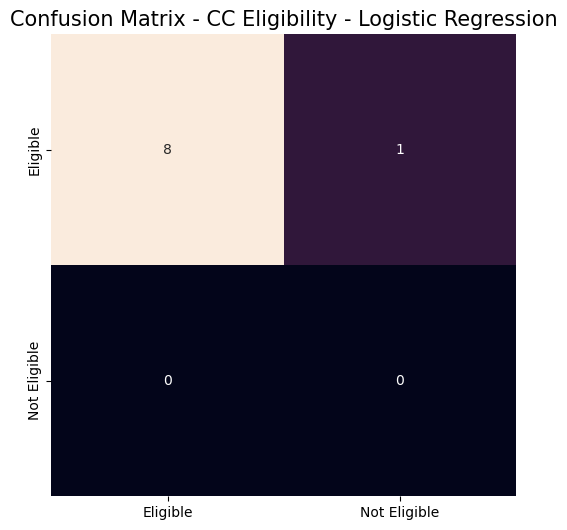

In [9]:
# Plot results
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
ax.set_title('Confusion Matrix - CC Eligibility - Logistic Regression', fontsize=15)


In [10]:
# Data prep for part 2
from sklearn.preprocessing import MultiLabelBinarizer


# Encode Product categories purchased text columns using MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(df['Product categories purchased'])
df_encoded = pd.DataFrame(encoded_data, columns=mlb.classes_)
df_encoded.head()

,Automotive,Beauty,Books,Clothing,Electronics,Home & Kitchen,Sports,Toys
0,0,1,0,1,0,1,0,1
1,1,1,0,0,1,1,0,0
2,1,0,1,0,0,1,1,0
3,1,0,0,0,1,1,1,0
4,1,1,0,1,1,0,0,0


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm with a minimum support of 0.2
frequent_itemsets = apriori(df_encoded, min_support=0.25, use_colnames=True)

# Generate association rules from frequent itemsets with minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

#print(rules)

rules = rules.sort_values(by='confidence', ascending=False)[:15]
rules


/Users/hemantsethi/opt/anaconda3/envs/csci/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Beauty),(Clothing),0.366667,0.733333,0.333333,0.909091,1.239669,0.064444,2.933333,0.305263
10,(Toys),(Clothing),0.500000,0.733333,0.400000,0.800000,1.090909,0.033333,1.333333,0.166667
6,(Books),(Clothing),0.466667,0.733333,0.333333,0.714286,0.974026,-0.008889,0.933333,-0.047619
8,(Home & Kitchen),(Clothing),0.466667,0.733333,0.300000,0.642857,0.876623,-0.042222,0.746667,-0.208791
9,(Sports),(Clothing),0.433333,0.733333,0.266667,0.615385,0.839161,-0.051111,0.693333,-0.252747
1,(Electronics),(Automotive),0.500000,0.533333,0.300000,0.600000,1.125000,0.033333,1.166667,0.222222
3,(Home & Kitchen),(Automotive),0.466667,0.533333,0.266667,0.571429,1.071429,0.017778,1.088889,0.125000
12,(Home & Kitchen),(Electronics),0.466667,0.500000,0.266667,0.571429,1.142857,0.033333,1.166667,0.234375
0,(Automotive),(Clothing),0.533333,0.733333,0.300000,0.562500,0.767045,-0.091111,0.609524,-0.394231
2,(Automotive),(Electronics),0.533333,0.500000,0.300000,0.562500,1.125000,0.033333,1.142857,0.238095


In [12]:
# Display results
print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False)[:15])

print("\nAssociation Rules:")
print(rules[['antecedents','confidence','consequents','support','lift']])

Frequent Itemsets:
     support                    itemsets
3   0.733333                  (Clothing)
0   0.533333                (Automotive)
4   0.500000               (Electronics)
7   0.500000                      (Toys)
2   0.466667                     (Books)
5   0.466667            (Home & Kitchen)
6   0.433333                    (Sports)
16  0.400000            (Toys, Clothing)
1   0.366667                    (Beauty)
12  0.333333           (Books, Clothing)
11  0.333333          (Beauty, Clothing)
14  0.300000  (Home & Kitchen, Clothing)
9   0.300000   (Electronics, Automotive)
8   0.300000      (Automotive, Clothing)
13  0.266667     (Electronics, Clothing)

Association Rules:
         antecedents  confidence       consequents   support      lift
5           (Beauty)    0.909091        (Clothing)  0.333333  1.239669
10            (Toys)    0.800000        (Clothing)  0.400000  1.090909
6            (Books)    0.714286        (Clothing)  0.333333  0.974026
8   (Home & Kitchen) 